<a href="https://colab.research.google.com/github/PhDNoe/Sistemas_de_Inferencia_difusos/blob/main/Sistema_FIS_Mamdani.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![separador](https://i.imgur.com/4gX5WFr.png)
# Ejemplo de sistemas de inferencia difusos Mamdani

Vamos a utilizar:
* la librería scikit-fuzzy 


![separador](https://i.imgur.com/4gX5WFr.png)

### Notebook de Noe 👻👻

![separador](https://i.imgur.com/4gX5WFr.png)


In [1]:
!pip install scikit-fuzzy
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 10.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894086 sha256=1b6d764e717976f53dec19825902c182a1b315bc7edcdc3dae1f8823e7e38675
  Stored in directory: /root/.cache/pip/wheels/32/2c/a1/a90a7d7dd8448ec029f298a61f3490275e99b17aa348be675c
Successfully built scikit-fuzzy


![separador](https://i.imgur.com/4gX5WFr.png)
### Guia Mamdani
#### Ej. 1

Un sistema de inferencia difuso con una sola entrada y una única salida se describe mediante las siguientes reglas:


> SI 𝒙 ES pequeño ENTONCES 𝒚 es pequeño <br>
SI 𝒙 ES mediano ENTONCES 𝒚 es mediano <br>
SI 𝒙 ES grande ENTONCES 𝒚 es grande

Las variables lingüísticas de la entrada se definen mediante funciones trapezoidales

> $μ_{pequeño}(x) = trapmf(x,[-20,-15,-6,-3])$<br>
$μ_{mediano}(x) = trapmf(x,[-6,-3,3,6])$ <br>
$μ_{grande}(x) = trapmf(x,[3,6,15,20])$

Las variables lingüísticas de la salida son:
> $μ_{pequeño}(y) = trapmf(y,[-2.46,\; -1.46,\; 1.46,\; 2.46])$<br>
$μ_{mediano}(y) = trapmf(y,[\;1.46,\;2.46,\;5,\;7])$ <br>
$μ_{grande}(y) = trapmf(y,[\;5,\;7,\;13,\;15])$


Calcular por el método de centroide la salida a las entradas x = 8, -5, 5, 8

![separador](https://i.imgur.com/4gX5WFr.png)


In [2]:

def defino_mu():
    ## Guia Mamdani, ejercicio 1
    x = np.arange(-20,21)
    y = np.arange(-3,15.5,0.5)
    # Generamos las membership functions
    mux_small = fuzz.trapmf(x, [-20, -15, -6, -3])
    mux_medium = fuzz.trapmf(x, [-6, -3, 3, 6])
    mux_big = fuzz.trapmf(x, [3, 6, 15, 20])

    muy_small = fuzz.trapmf(y, [-2.46, -1.46, 1.46, 2.46])
    muy_medium = fuzz.trapmf(y, [1.46, 2.46, 5, 7])
    muy_big = fuzz.trapmf(y, [5, 7, 13, 15])

    mu_entrada = (mux_small, mux_medium, mux_big)
    mu_salida = (muy_small, muy_medium, muy_big)
    return x, y, mu_entrada, mu_salida

def ploteo_mu(x, y, mu_entrada, mu_salida):

    mux_small, mux_medium, mux_big = mu_entrada
    muy_small, muy_medium, muy_big = mu_salida
    fig, (ax0, ax1) = plt.subplots(nrows=2, figsize=(8, 9))

    ax0.plot(x, mux_small, 'b', linewidth=1.5, label='x small')
    ax0.plot(x, mux_medium, 'g', linewidth=1.5, label='x medium')
    ax0.plot(x, mux_big,'r', linewidth=1.5, label='x big')
    ax0.set_title('Entrada x')
    ax0.legend()

    ax1.plot(y, muy_small, 'b', linewidth=1.5, label='y small')
    ax1.plot(y, muy_medium, 'g', linewidth=1.5, label='y medium')
    ax1.plot(y, muy_big,'r', linewidth=1.5, label='y big')
    ax1.set_title('Salida y')
    ax1.legend()

    # Turn off top/right axes
    for ax in (ax0, ax1):
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.get_xaxis().tick_bottom()
        ax.get_yaxis().tick_left()

    plt.tight_layout()


x_test = [ 8, -5, 5, 8]

xx = x_test[2]

def defino_y_evaluo_reglas(x, y, mu_entrada, mu_salida, valor_eval):

    mux_small, mux_medium, mux_big = mu_entrada
    muy_small, muy_medium, muy_big = mu_salida
    
    x_lvl_small= fuzz.interp_membership(x, mux_small, valor_eval)
    x_lvl_medium = fuzz.interp_membership(x, mux_medium, valor_eval)
    x_lvl_big = fuzz.interp_membership(x, mux_big, valor_eval)

    # Regla 1
    active_rule1 = x_lvl_small  ## no calculamos nada porque las reglas son simples
    y_activation_small = np.fmin(active_rule1, muy_small)  # removed entirely to 0

    # Regla 2
    active_rule2 = x_lvl_medium
    y_activation_medium = np.fmin(active_rule2, muy_medium)

    # Regla 3
    active_rule3 = x_lvl_big
    y_activation_big = np.fmin(active_rule3, muy_big)

    y_act = (y_activation_small, y_activation_medium, y_activation_big)
    return y_act

def ploteo_activacion(y, y_act, valor_eval, mu_salida):

    muy_small, muy_medium, muy_big = mu_salida
    y_activation_small, y_activation_medium, y_activation_big  = y_act   
    y0 = np.zeros_like(y)  # Es para graficar

    fig, ax0 = plt.subplots(figsize=(8, 3))

    ax0.fill_between(y, y0, y_activation_small, facecolor='b', alpha=0.7)
    ax0.plot(y, muy_small, 'b', linewidth=0.5, linestyle='--', )
    ax0.fill_between(y, y0, y_activation_medium, facecolor='g', alpha=0.7)
    ax0.plot(y, muy_medium, 'g', linewidth=0.5, linestyle='--')
    ax0.fill_between(y, y0, y_activation_big,  facecolor='r', alpha=0.7)
    ax0.plot(y, muy_big, 'r', linewidth=0.5, linestyle='--')
    ax0.set_title(f'Output membership activity for x={valor_eval}')

    # Turn off top/right axes
    for ax in (ax0, ):
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.get_xaxis().tick_bottom()
        ax.get_yaxis().tick_left()

    plt.tight_layout()


def calculo_agregacion(y, y_act):
    
    y_activation_small, y_activation_medium, y_activation_big  = y_act
    # aggregation
    aggregated = np.fmax(y_activation_small,
                        np.fmax(y_activation_medium, y_activation_big))

    # Defuzzification
    y_final = fuzz.defuzz(y, aggregated, 'centroid')
    y_activation = fuzz.interp_membership(y, aggregated, y_final)  # for plot

    return y_final, y_activation, aggregated


def ploteo_final(y, mu_salida, aggregated, y_final, y_activation, valor_eval):
    muy_small, muy_medium, muy_big = mu_salida
    y0 = np.zeros_like(y)
    # visualizamos
    fig, ax0 = plt.subplots(figsize=(8, 3))

    ax0.plot(y, muy_small, 'b', linewidth=0.5, linestyle='--', )
    ax0.plot(y, muy_medium, 'g', linewidth=0.5, linestyle='--')
    ax0.plot(y, muy_big, 'r', linewidth=0.5, linestyle='--')
    ax0.fill_between(y, y0, aggregated, facecolor='Orange', alpha=0.7)
    ax0.plot([y_final, y_final], [0, y_activation], 'k', linewidth=1.5, alpha=0.9)
    ax0.set_title(f'Aggregated membership and result (line) for x = {valor_eval}')
    ax0.text(0.5,0.5, f'Salida = {round(y_final,2)}', fontsize = 22)

    # Turn off top/right axes
    for ax in (ax0,):
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.get_xaxis().tick_bottom()
        ax.get_yaxis().tick_left()

    plt.tight_layout()

def mamdani_ej_1(valor_eval):

     x, y, mu_entrada, mu_salida = defino_mu()
     ploteo_mu(x, y, mu_entrada, mu_salida)
     y_act = defino_y_evaluo_reglas(x, y, mu_entrada, mu_salida, valor_eval)
     ploteo_activacion(y, y_act, valor_eval, mu_salida)
     y_final, y_activation, aggregated = calculo_agregacion(y, y_act)
     ploteo_final(y, mu_salida, aggregated, y_final, y_activation, valor_eval)


---

## Invocamos a las funciones para evaluar el sistema en los valores especificados

---

Evaluando para X = 8




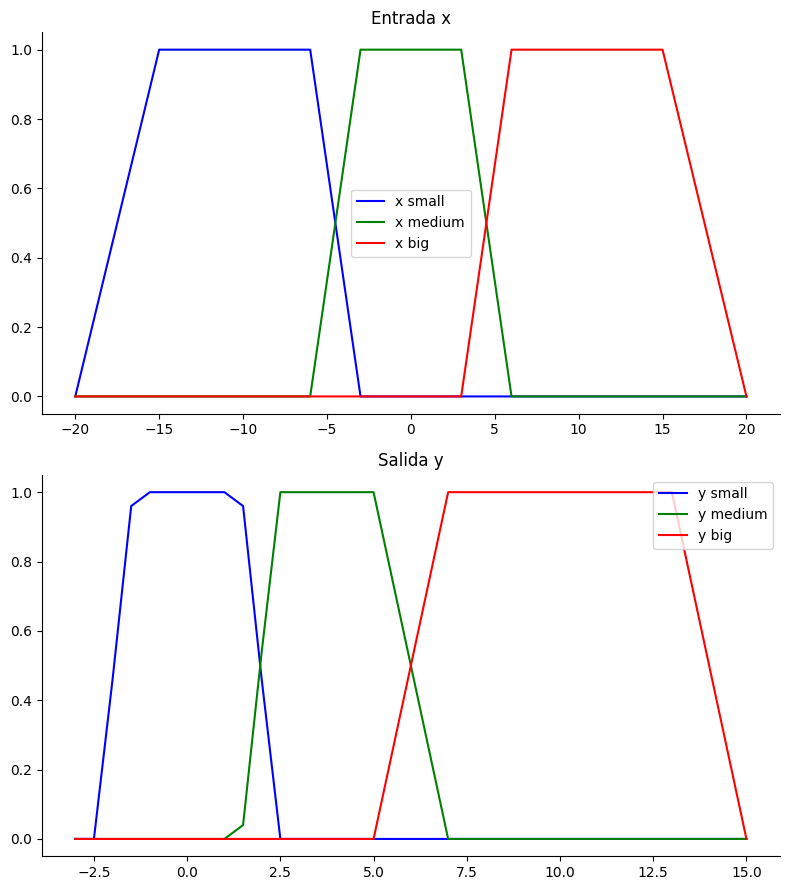

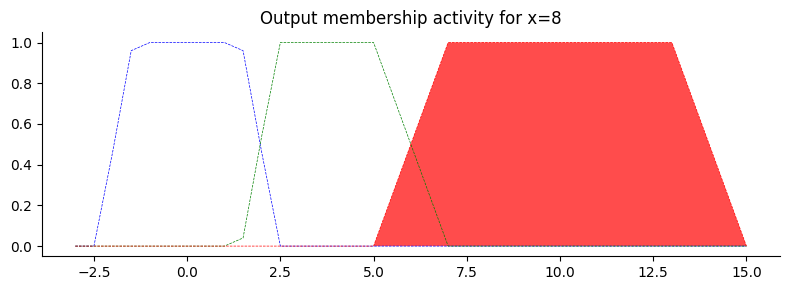

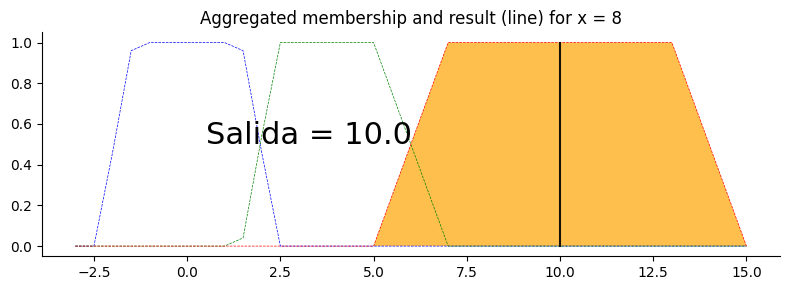

In [7]:

# Evaluamos para distintos valores
x_test = [ 8, -5, 5, 8]

i = 0
print(f"Evaluando para X = {x_test[i]}\n\n")
mamdani_ej_1(x_test[i])


Evaluando para X = -5




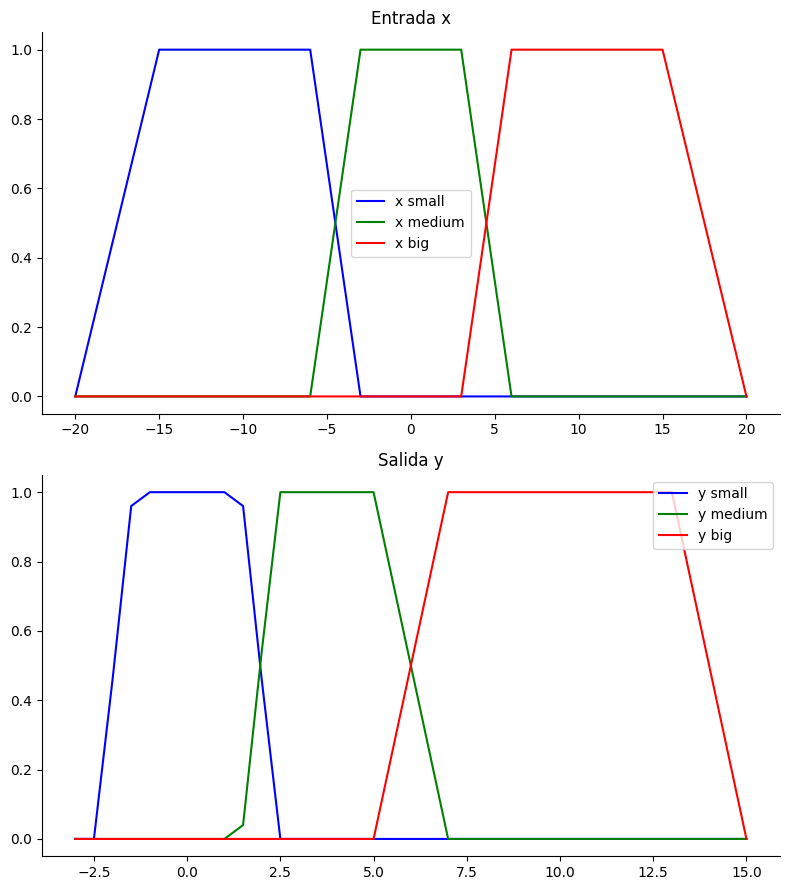

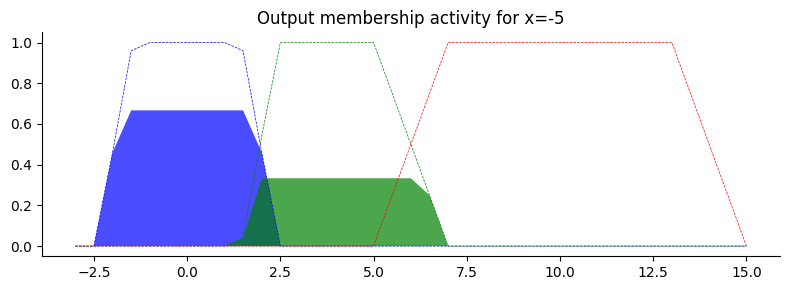

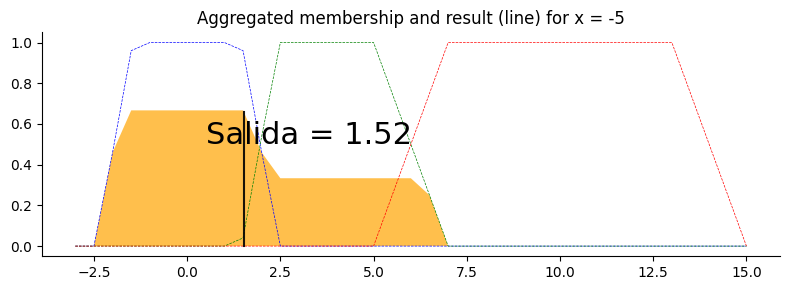

In [8]:

# Evaluamos para distintos valores
x_test = [ 8, -5, 5, 8]

i = 1
print(f"Evaluando para X = {x_test[i]}\n\n")
mamdani_ej_1(x_test[i])


Evaluando para X = 5




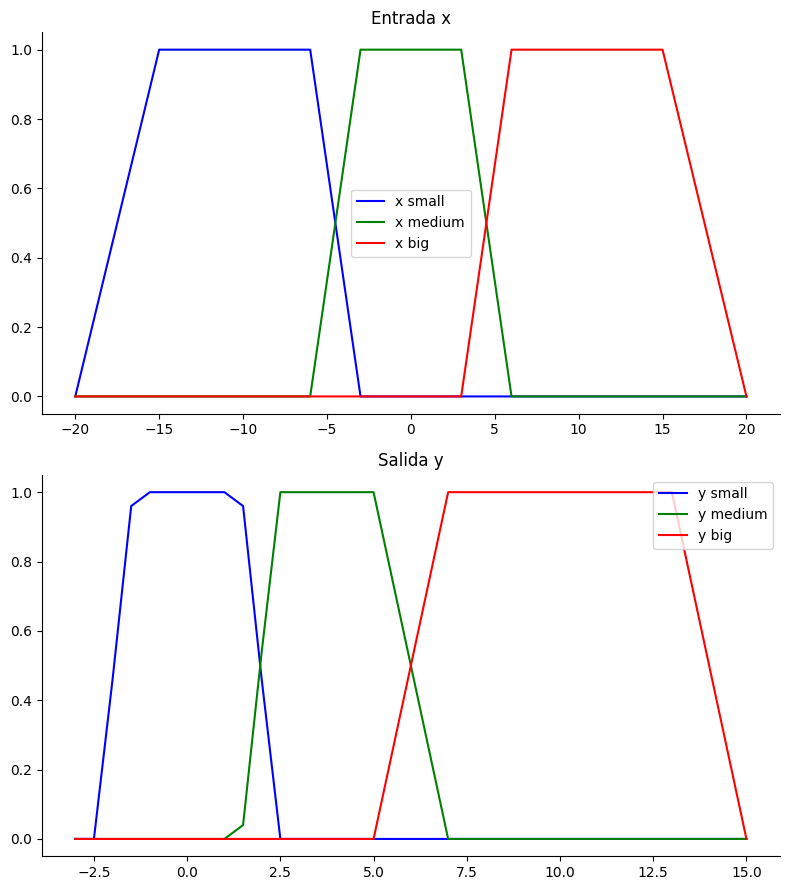

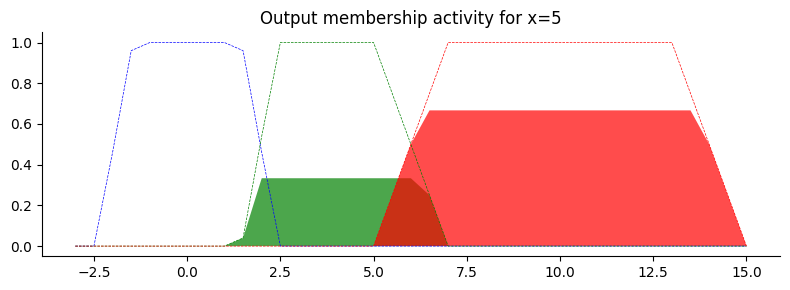

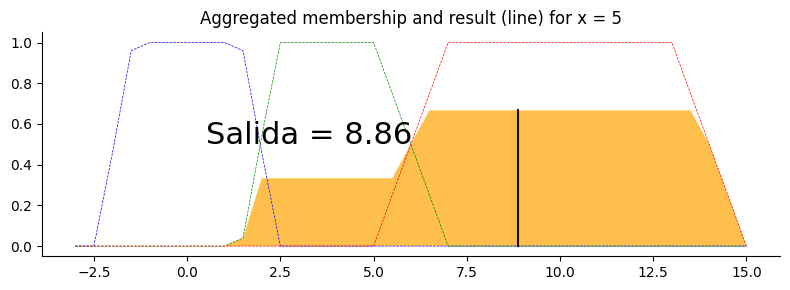

In [9]:

# Evaluamos para distintos valores
x_test = [ 8, -5, 5, 8]

i = 2
print(f"Evaluando para X = {x_test[i]}\n\n")
mamdani_ej_1(x_test[i])


Evaluando para X = 8




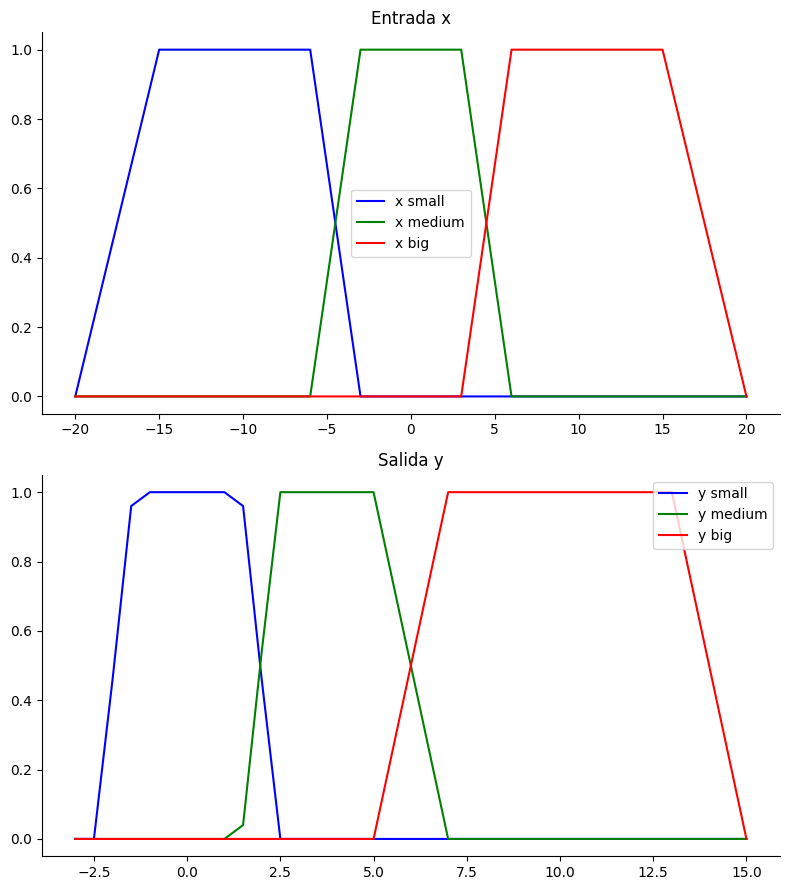

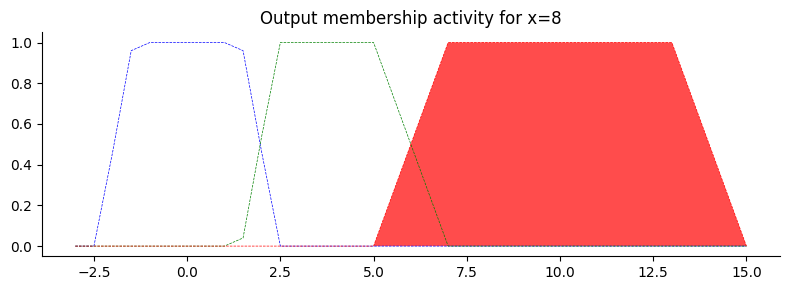

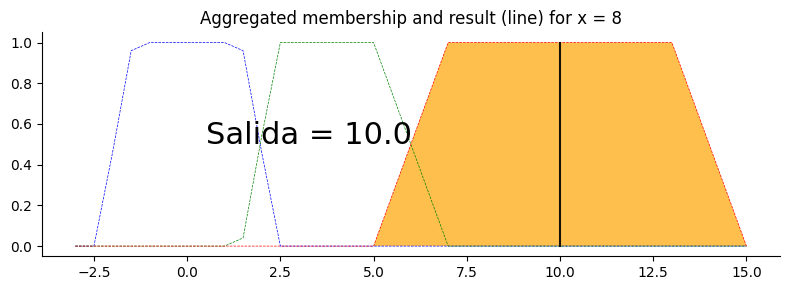

In [10]:

# Evaluamos para distintos valores
x_test = [ 8, -5, 5, 8]

i = 3
print(f"Evaluando para X = {x_test[i]}\n\n")
mamdani_ej_1(x_test[i])
